In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb

In [3]:
(X_train, y_train), (X_test,y_test) = imdb.load_data()

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

17473536/17464789 [==============================] - 0s 0us/step
훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [4]:
print('첫번째 훈련용 리뷰 :',X_train[0])
print('첫번째 훈련용 리뷰의 레이블 :',y_train[0])

첫번째 훈련용 리뷰 : [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
첫번째 훈련용 리뷰의 레이블 : 1


리뷰의 최대 길이 : 2494
리뷰의 평균 길이 : 238.71364


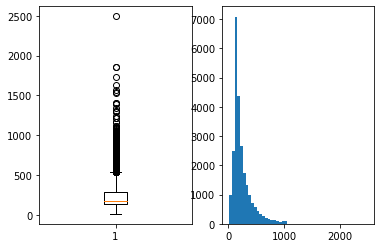

In [5]:
reviews_length = [len(review) for review in X_train]

print('리뷰의 최대 길이 : {}'.format(np.max(reviews_length)))
print('리뷰의 평균 길이 : {}'.format(np.mean(reviews_length)))

plt.subplot(1,2,1)
plt.boxplot(reviews_length)
plt.subplot(1,2,2)
plt.hist(reviews_length,bins=50)
plt.show()

In [6]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 레이블에 대한 빈도수:")
print(np.asarray((unique_elements,counts_elements)))

각 레이블에 대한 빈도수:
[[    0     1]
 [12500 12500]]


In [7]:
word_to_index = imdb.get_word_index()
index_to_word = {}
for key, value in word_to_index.items():
  index_to_word[value+3]=key

1654784/1641221 [==============================] - 0s 0us/step


In [8]:
print('빈도수 상위 1등 단어: {}'.format(index_to_word[4]))
print('빈도수 상위 3940등 단어 : {}'.format(index_to_word[3943]))

빈도수 상위 1등 단어: the
빈도수 상위 3940등 단어 : staged


In [9]:
for index, token in enumerate(("<pad>","<sos>","<unk>")):
  index_to_word[index]=token

print(' '.join([index_to_word[index] for index in X_train[24999]]))

<sos> as a big fan of the original film it's hard to watch this show the garish set decor and harshly lighted sets rob any style from this remake the mood is never there instead it has the look and feel of so many television movies of the seventies crenna is not a bad choice as walter neff but his snappy wardrobe and swank apartment don't fit the mood of the original or make him an interesting character he does his best to make it work but samantha egger is a really bad choice the english accent and california looks can't hold a candle to barbara stanwick's velvet voice and sex appeal lee j cobb tries mightily to fashion barton keyes but even his performance is just gruff without style br br it feels like the tv movie it was and again reminds me of what a remarkable film the original still is


In [10]:
import re
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU,SimpleRNN, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 10000
max_len = 500

(X_train,y_train),(X_test,y_test) = imdb.load_data(num_words=vocab_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [11]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('GRU_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - ETA: 0s - loss: 0.5153 - acc: 0.7569
Epoch 1: val_acc improved from -inf to 0.76520, saving model to GRU_model.h5
313/313 [==============================] - 35s 90ms/step - loss: 0.5153 - acc: 0.7569 - val_loss: 0.4748 - val_acc: 0.7652
Epoch 2/15
313/313 [==============================] - ETA: 0s - loss: 0.3236 - acc: 0.8701
Epoch 2: val_acc improved from 0.76520 to 0.85360, saving model to GRU_model.h5
313/313 [==============================] - 27s 88ms/step - loss: 0.3236 - acc: 0.8701 - val_loss: 0.3443 - val_acc: 0.8536
Epoch 3/15
313/313 [==============================] - ETA: 0s - loss: 0.2515 - acc: 0.9012
Epoch 3: val_acc improved from 0.85360 to 0.87800, saving model to GRU_model.h5
313/313 [==============================] - 27s 87ms/step - loss: 0.2515 - acc: 0.9012 - val_loss: 0.3215 - val_acc: 0.8780
Epoch 4/15
313/313 [==============================] - ETA: 0s - loss: 0.2046 - acc: 0.9213
Epoch 4: val_acc did not impro

In [12]:
loaded_model = load_model('GRU_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 30s 38ms/step - loss: 0.3297 - acc: 0.8887

 테스트 정확도: 0.8887


In [13]:
good_num=0
bad_num=0

In [14]:
def sentiment_predict(new_sentence):
  # 알파벳과 숫자를 제외하고 모두 제거 및 알파벳 소문자화
  new_sentence = re.sub('[^0-9a-zA-Z ]', '', new_sentence).lower()
  encoded = []

  global good_num, bad_num
  # 띄어쓰기 단위 토큰화 후 정수 인코딩
  for word in new_sentence.split():
    try :
      # 단어 집합의 크기를 10,000으로 제한.
      if word_to_index[word] <= 10000:
        encoded.append(word_to_index[word]+3)
      else:
      # 10,000 이상의 숫자는 <unk> 토큰으로 변환.
        encoded.append(2)
    # 단어 집합에 없는 단어는 <unk> 토큰으로 변환.
    except KeyError:
      encoded.append(2)

  pad_sequence = pad_sequences([encoded], maxlen=max_len)
  score = float(loaded_model.predict(pad_sequence)) # 예측

  if(score > 0.5):
   good_num=good_num+1
  else:
   bad_num=bad_num+1

In [15]:
import pandas as pd

train_set = pd.read_csv('/content/train.csv')
test_set = pd.read_csv('/content/test.csv')
game_ov = pd.read_csv('/content/game_overview.csv')

In [42]:
train_set.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1


In [43]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17494 entries, 0 to 17493
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   review_id        17494 non-null  int64  
 1   title            17494 non-null  object 
 2   year             17316 non-null  float64
 3   user_review      17494 non-null  object 
 4   user_suggestion  17494 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 683.5+ KB


In [16]:
x = train_set["user_review"]
y = train_set["user_suggestion"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


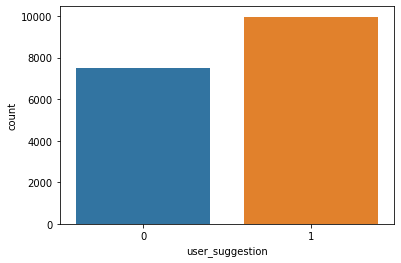

In [18]:
import seaborn as sns
sns.countplot(train_set["user_suggestion"])
plt.show()

In [19]:
good_num=0
bad_num=0
for input_data in x :
  sentiment_predict(input_data)
print(good_num)
print(bad_num)

9932
7562


In [26]:
zero_num=0
one_num=0
for temp in y:
  if temp:
    one_num=one_num+1
  else:
    zero_num=zero_num+1
print(one_num)
print(zero_num)

9968
7526
